## Import Libraries

In [40]:
import tensorflow as tf
import os

### Remove Dodgy Images

In [41]:
import cv2
import imghdr

In [42]:
data_dir=r"C:\Users\avvar\FL Detection\neww_train"

In [43]:
os.listdir(data_dir)

['fake', 'original']

In [44]:
image_exts=['jpeg','jpg','bmp','png']

In [45]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

### Loading the Data

In [46]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
data=tf.keras.utils.image_dataset_from_directory(r"C:\Users\avvar\FL Detection\neww_train")

Found 619 files belonging to 2 classes.


In [48]:
data_iterator=data.as_numpy_iterator()

In [49]:
batch=data_iterator.next() #Get another batch from the iterator

In [50]:
batch[0].shape #Images represented as numpy arrays

(32, 256, 256, 3)

In [51]:
batch[1] # class 0 - Fake, class 1 - Real

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

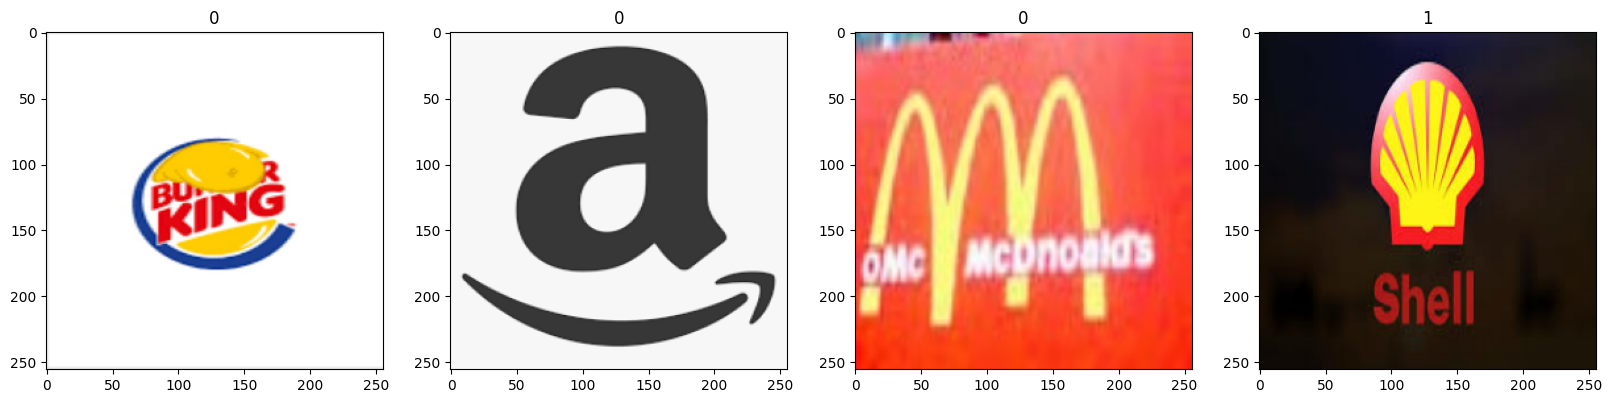

In [52]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocess Data

#### Scale Data

In [53]:
data=data.map(lambda x,y:(x/255,y))

In [54]:
scaled_iterator=data.as_numpy_iterator()

In [55]:
batch=scaled_iterator.next()

In [56]:
batch[0].min()

0.0

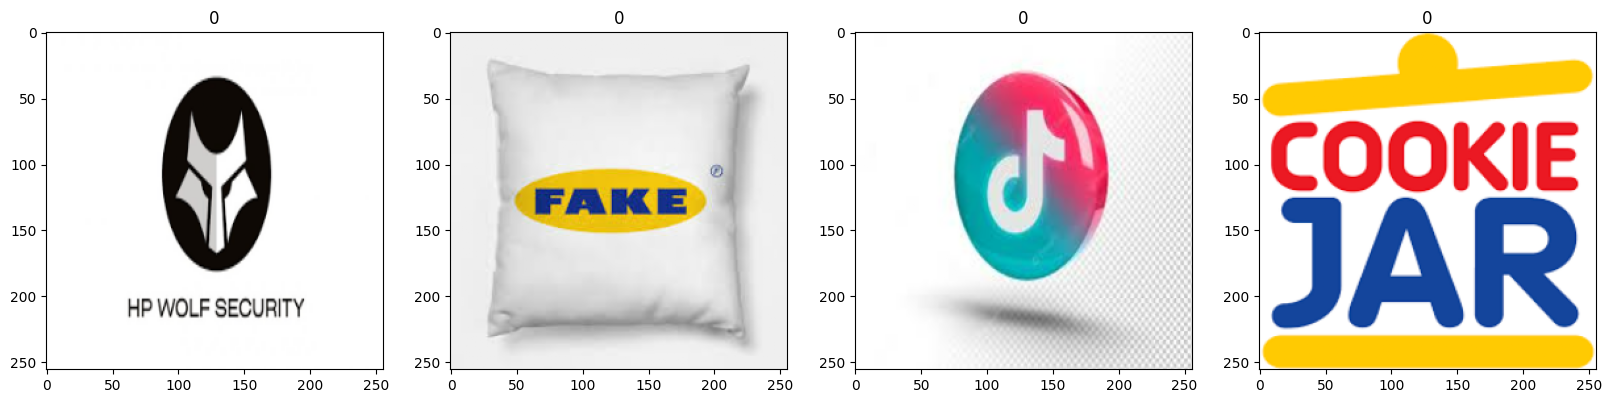

In [57]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Split Data

In [58]:
len(data)

20

In [59]:
train_size=int(len(data)*.6)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+2

In [60]:
train_size

12

In [61]:
val_size

4

In [62]:
test_size

4

In [63]:
train_size+val_size+test_size

20

In [64]:
train=data.take(train_size)
val=data.take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [65]:
len(train)

12

In [66]:
len(test)

4

In [67]:
len(val)

4

### Building Deep Learning Model

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [69]:
model=Sequential()

In [70]:

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [71]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

### Training

In [73]:
logdir='logs'

In [74]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [75]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
12/12 [==============================] - 15s 1s/step - loss: 0.7889 - accuracy: 0.4974 - val_loss: 0.6843 - val_accuracy: 0.6328
Epoch 2/20
12/12 [==============================] - 13s 1s/step - loss: 0.6835 - accuracy: 0.6068 - val_loss: 0.6585 - val_accuracy: 0.5859
Epoch 3/20
12/12 [==============================] - 14s 1s/step - loss: 0.6573 - accuracy: 0.6849 - val_loss: 0.6456 - val_accuracy: 0.5938
Epoch 4/20
12/12 [==============================] - 14s 1s/step - loss: 0.6403 - accuracy: 0.6198 - val_loss: 0.5860 - val_accuracy: 0.7500
Epoch 5/20
12/12 [==============================] - 14s 1s/step - loss: 0.5765 - accuracy: 0.7214 - val_loss: 0.5241 - val_accuracy: 0.7578
Epoch 6/20
12/12 [==============================] - 14s 1s/step - loss: 0.5137 - accuracy: 0.7396 - val_loss: 0.4073 - val_accuracy: 0.8516
Epoch 7/20
12/12 [==============================] - 14s 1s/step - loss: 0.4200 - accuracy: 0.8281 - val_loss: 0.3035 - val_accuracy: 0.9141
Epoch 8/20
12/12 [==

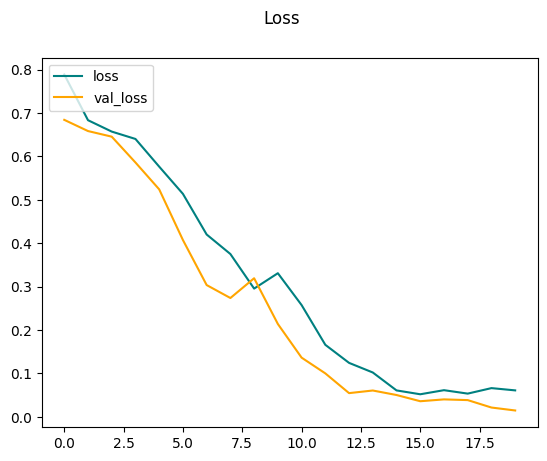

In [76]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss')
plt.legend(loc='upper left')
plt.show()

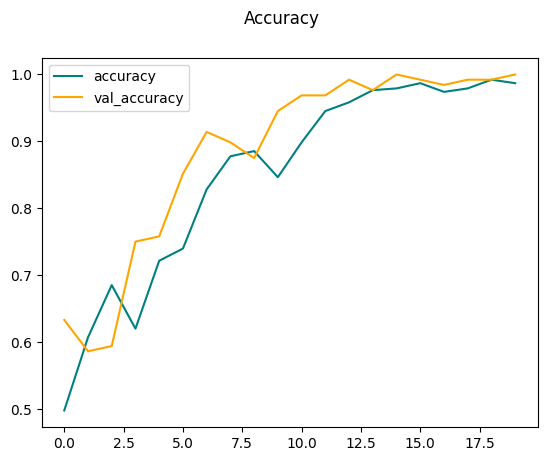

In [77]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc='upper left')
plt.show()

### Evaluate Performance

In [78]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [79]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [80]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [81]:
print('Precision',pre.result().numpy())
print('Recall',re.result().numpy())
print('Accuracy',acc.result().numpy())

Precision 1.0
Recall 0.9056604
Accuracy 0.94602275


### Testing

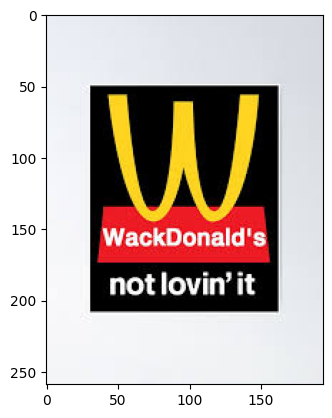

In [82]:
img=cv2.imread(r"C:\Users\avvar\Downloads\wa.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

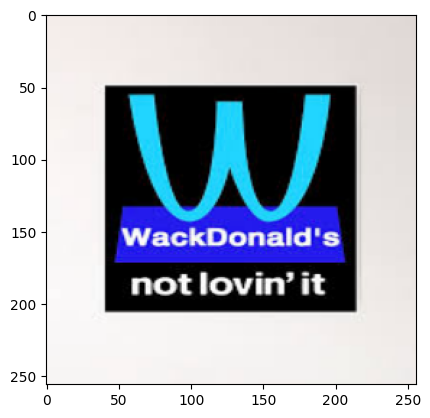

In [83]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [84]:
yhat=model.predict(np.expand_dims(resize/255,0))

In [85]:
yhat

array([[9.752529e-06]], dtype=float32)

In [86]:
if yhat>0.5:
    print(f'Predicted Image is Fake')
else:
    print(f'Predicted Image is Real')

Predicted Image is Real


### Save The Model

In [87]:
from tensorflow.keras.models import load_model

In [88]:
model.save(os.path.join('models','fldetection.h5'))

In [89]:
new_model=load_model(os.path.join('models','fldetection.h5'))

In [90]:
yhat_new=new_model.predict(np.expand_dims(resize/255,0))

In [91]:
if yhat>0.5:
    print(f'Predicted Image is Fake')
else:
    print(f'Predicted Image is Real')

Predicted Image is Real
